<a href="https://colab.research.google.com/github/erodola/NumMeth-s2-2022/blob/main/esercizi/ex4/ex4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Benvenuti alla quarta esercitazione di Metodi Numerici!

Oggi vedremo l'ortogonalità, matrici ortonormali, proiezioni e l'algoritmo di Gram-Schmidt

In [ ]:
import numpy as np
import matplotlib.pyplot as plt 
from PIL import Image

!wget https://t4.ftcdn.net/jpg/01/52/12/09/360_F_152120967_dzEk7G81W4sTjWOznCLssHkBMXTsVF1z.jpg -O cat.jpg

# Instabilità numerica

Vediamo un esempio di instabilità numerica presentata nella slide 4 della lezione e compariamola invece con una matrice ben condizionata.

In [ ]:
a1 = np.array([[0, 1e-15],[1,1+1e-15]])
a2 = np.array([[1, 2],[1,-1]])

print(f"Matrice a1:\n {a1}")
print("\n")
print(f"Matrice a2:\n {a2}")

Queste due matrici sono composte ognuna da 2 vettori colonna con due righe. Se queste hanno rango pieno, allora i vettori colonna forniscono una base per lo spazio $\mathbb{R}^2$

In [ ]:
print(f"Rango di a1: {np.linalg.matrix_rank(a1)}")
print(f"Rango di a2: {np.linalg.matrix_rank(a2)}")

Dato un vettore $b \in \mathbb{R}^2$, possiamo trovare la sua rappresentazione nelle due basi risolvendo il sistema lineare $A x = b$; ovvero:
$x = A^{-1} b$

In [ ]:
b = np.asarray([50.0,6.0]).T
x1 = np.linalg.inv(a1) @ b
x2 = np.linalg.inv(a2) @ b

print(x1)
print(x2)

Notiamo che per la prima base ha dovuto utilizzare dei coefficienti molto grandi

In [ ]:
print(f"Secondo la base instabile: {a1 @ x1}")
print(f"Secondo la base stabile: {a2 @ x2}")

# Operazione di proiezione

$proj_\mathbb{a} \mathbb{b} = \frac{\mathbb{a}^T\mathbb{b}}{\|\mathbb{a}\|_2^2}\mathbb{a}$

Consideriamo di proiettare il vettore $b=\begin{bmatrix} 1.0 \\ 1.0\end{bmatrix}$ lungo il vettore $a=\begin{bmatrix} 2.0 \\ 0.0\end{bmatrix}$ 

In [ ]:
a = np.array([2.0, 0.0])
b = np.array([1.0, 1.0])

c = (a.T @ b) / (np.linalg.norm(a,2))**2 
print(c)

Visualizziamolo nel piano:
- Freccia nera = $\mathbb{a}$
- Freccia blu = $\mathbb{b}$
- Freccia rossa = $\mathbb{b}c$

In [ ]:
# La funzione "quiver" di matplotlib.pyplot ci permette di disegnare delle frecce
# gli argomenti sono 4 vettori plt.quiver(u,v,x,y): 
# u: coordinata x dove far partire le code delle frecce
# v: coordinata y dove far partire le code delle fracce
# x: offset lungo l'asse delle x
# y: offset lungo l'asse delle y
# noi faremo partire le frecce dall'origine quindi u=v=0

plt.quiver([0],[0],a[0],a[1], angles='xy', scale_units='xy', scale=1)
plt.quiver([0],[0],b[0],b[1], angles='xy', scale_units='xy', scale=1, color='b')

plt.quiver([0],[0],a[0]*c,a[1]*c, angles='xy', scale_units='xy', scale=1, color='r')

plt.plot([a[0]*c,b[0]], [a[1]*c,b[1]],'--')
plt.ylim([-2,2])
plt.xlim([-2,2])

Consideriamo ora una base completa ed ortonormale per $\mathbb{R}^2$:
- Frecce nere = base $\mathbb{a}$
- Freccia blu = $\mathbb{b}$

In [ ]:
# Base ottenuta attraverso degli angoli
A = np.array([[np.cos(np.pi/4),np.sin(np.pi/4)],[np.cos(7*np.pi/4),np.sin(7*np.pi/4)]])

# Ipotetico vettore da proiettare
b = np.array([[-1],[0.35]])

# Disegno
plt.quiver([0,0],[0,0],A[:,0],A[:,1], angles='xy', scale_units='xy', scale=1)
plt.quiver([0],[0],b[0],b[1], angles='xy', scale_units='xy', scale=1,color='b')

plt.ylim([-2,2])
plt.xlim([-2,2])

Esercizio 1: 
 
- Sinceratevi che $\mathbf{A}$ sia ortonormale: Sappiamo che deve valere che $\mathbf{A}^T = \mathbf{A}^{-1} \implies \mathbf{A}^T \mathbf{A} = \mathbf{I}$
- Ricavate i coefficienti $c_0$ e $c_1$ dati dalla proiezione di $\mathbf{b}$ sulla base
- Visualizzate $\mathbf{A_0}c_0 $ e $\mathbf{A_1}c_1 $ nel grafico come due frecce rosse


In [ ]:
# Stampa True se la matrice è ortogonale
print(bool(...))

# Ricaviamoci i coefficienti
c = ...

print(c)

# Visualizziamo 
plt.quiver([0,0],[0,0],A[:,0],A[:,1], angles='xy', scale_units='xy', scale=1)
plt.quiver([0],[0],b[0],b[1], angles='xy', scale_units='xy', scale=1,color='b')

# Visualizziamo le due frecce rosse
plt.quiver([0],[0],..., ..., angles='xy', scale_units='xy', scale=1, color='r')
plt.quiver([0],[0],..., ..., angles='xy', scale_units='xy', scale=1, color='r')

# Linee tratteggiate
plt.plot([..., b[0]], [..., b[1]],'g--')
plt.plot([..., b[0]], [..., b[1]],'g--')

plt.ylim([-2,2])
plt.xlim([-2,2])

A lezione avete visto alcune matrici ortonormali (la matrice identità, le matrici di permutazione). 

Un'altra famiglia di matrici molto interessanti sono le matrici di rotazione. Esse sono nella forma:

$\mathbf{R}_\theta = \begin{bmatrix} cos \theta & - sin \theta \\ sin \theta & cos \theta \end{bmatrix}$

dove $\theta$ è l'angolo di rotazione.

Esercizio 2: 
- Dimostrare matematicamente che le rotazioni sono matrici ortonormali
- Scrivere la funzione "rotation_matrix" che dato un angolo $\theta$ ritorna la matrice di rotazione 2D associata
- Applicare una rotazione $\mathbb{R}_{45}$ al vettore $b=\begin{bmatrix} 4 \\ 0 \end{bmatrix}$ e mostrare che preserva lunghezza
- Applicare la stessa rotazione al vettore $c=\begin{bmatrix} 2 \\ 1 \end{bmatrix}$ e mostrare che preserva l'angolo tra i due vettori $b$ e $c$
- Visualizzare il vettore $b$ in blu e il vettore $\mathbb{R}_{45}  b$ in rosso

In [ ]:
# Funzione che ritorna la matrice associata a un certo angolo
def rotation_matrix(theta):
  return np.array(...)

# Vettore b
b = np.array([4,0]).T
plt.quiver([0],[0],b[0],b[1], angles='xy', scale_units='xy', scale=1,color='b')

# Calcolo la matrice di rotazione di 45° gradi
R = ...

# Applico la rotazione
b_r = ...

# Stampo True se b e la sua versione ruotata hanno la stessa lunghezza
print(...)

c = np.array([2,1])
c_r = ...

# Stampo True se l'angolo tra b e c è lo stesso che tra b_r e c_r
print(...)

# Visualizzo i vettori b e b_r
plt.quiver(...)
plt.quiver(...)

plt.axis('equal')
plt.ylim([-5,5])
plt.xlim([-5,5])

Esercizio 3
- Come potremmo fare a ruotare un immagine utilizzando vettori e matrici di rotazione?
- Provate a modificare la rotazione e rendetela una matrice non ortonormale. Come cambiano le lunghezze?

In [ ]:
image = Image.open('cat.jpg')
image = (np.array(image) / np.max(np.array(image)))[:,:,0:3]

# Prepariamo il nuovo piano immagine
# la rotazione potrebbe richiedere più spazio dell'immagine originale
image_new = np.zeros((image.shape[0]*3,image.shape[1]*3))

R = rotation_matrix(2*np.pi/4)

for i in range(0,...):
  for j in range(0,...):
    ...
    
plt.imshow(image_new, cmap='gray')

Esercizio 4

Data la matrice $A=\begin{bmatrix}0.5 & 0.5 \\ 0.0 & 0.5 \\ 0 & 0 \end{bmatrix}$:
- la matrice $P_{inv} = A A^{-1}$ che azione svolge su lunghezze e angoli dei vettori? (Ad esempio $b =\begin{bmatrix} 1 \\ 1 \\ 1 \end{bmatrix}$)
- la matrice $P_{T} = A A^{T}$ che azione svolge su lunghezze e angoli dei vettori? (Ad esempio $b =\begin{bmatrix} 1 \\ 1 \\ 1 \end{bmatrix}$)
- data una nuvola di punti in $v \in \mathbb{R}^3$, verificate il comportamento delle due matrici

In [ ]:
# Codice per formare un cubo unitario
x_min = 0.5; x_max = -0.5
y_min = -0.5; y_max = 0.5
z_min = 1.0; z_max=2

P = np.meshgrid(np.linspace(x_min,x_max,10),np.linspace(y_min,y_max,10),np.linspace(z_min,z_max,10))
Points = [x.flatten() for x in P]
points = np.vstack(Points).T

In [ ]:
import plotly.graph_objects as go

A = np.asarray([[0.5,0,0],[0.5,0.5,0]]).T

P_inv = ...
# P_T = ...

points_pj = ...

x = points[:,0]; y = points[:,1]; z = points[:,2]
x_p = points_pj[:,0]; y_p = points_pj[:,1]; z_p = points_pj[:,2]

# === Visualizzazioni ===
fig = go.Figure(data=[
                      go.Scatter3d(x=x, y=y, z=z,
                                   mode='markers'),
                      go.Scatter3d(x=x_p, y=y_p, z=z_p,
                                   mode='markers')])

fig.update_layout(
    scene = dict(
        xaxis = dict(nticks=4, range=[-5,5],),
                     yaxis = dict(nticks=4, range=[-5,5],),
                     zaxis = dict(nticks=4, range=[-5,5],),),
    width=700,
    margin=dict(r=20, l=10, b=10, t=10))

fig.update_yaxes(
    scaleanchor = "x",
    scaleratio = 1,
  )
fig['layout']['scene']['aspectmode'] = "cube"
fig.show()

# Ortogonalizzazione e Gram-Schmidt

A lezione avete visto che date le colonne di una matrice $A$ non ortonormale, è possibile fattorizzarla in $A=QR$, in modo che $Q$ sia ortonormale, e: $\text{col } A = \text{col }  Q$

Vediamo prima di tutto una funzione che svolge questo processo.

In [ ]:
# Esiste una funzione numpy per ottenerla.
A = np.array([[0, 1e-5],[1,1+1e-5]])

Q, R = np.linalg.qr(a1)

print(A)
print(Q)
print(f"Q è ortonormale? Risposta: {bool(np.prod(Q.T @ Q == np.eye(Q.shape[0])))}")

L'algoritmo di Gram-Schmidt ci permette di estrarre una matrice ortonormale partendo dalla matrice di partenza. L'algoritmo è costituito dai seguenti passi:

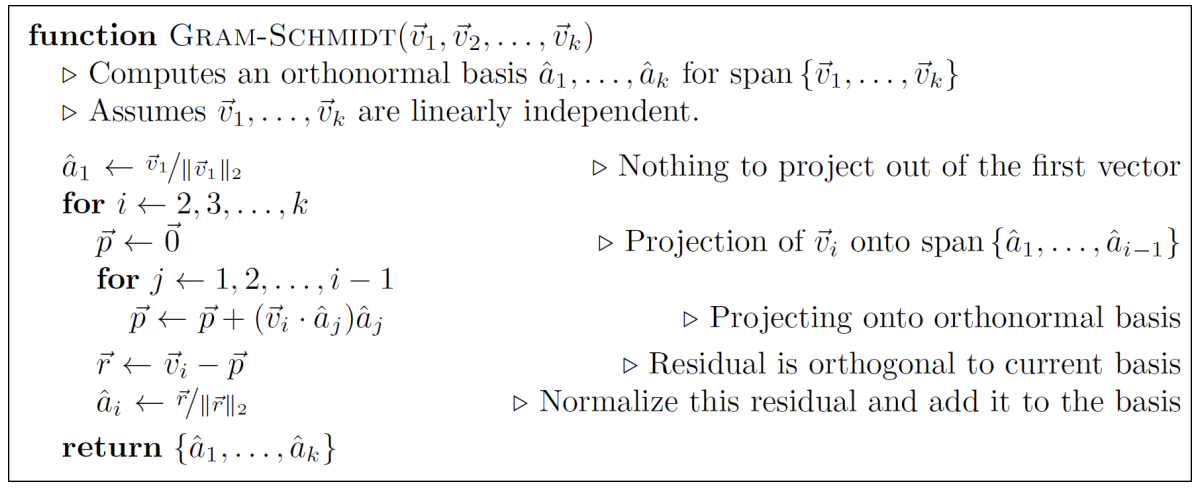

Esercizio 5: 
- Implementate la vostra versione dell'algoritmo di Gram-Schmidt
- Verificate che il vostro output sia ortonormale
- Verificate che il vostro output spanni lo spazio dei vettori in input

In [ ]:
def gram_schmidt(V):
  ...
  return A

V = np.array([[7.5,-7.5],[7.5,0.0],[0,5]])
V_o = gram_schmidt(V)

print(V)
print(V_o)

# Stampiamo True se V_o è ortonormale
print(f"V_o è ortonormale: {bool(...)}")

# Verifichiamo che spannino lo stesso spazio
print(f"V_o e V spannano lo stesso spazio: {bool(...)}")